In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn import tree
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [2]:
Population=pd.read_csv('synthetic_population_eval.csv')
Population.head()

,Unnamed: 0,ID,age1,age2,age3,income1,income2,income3,income4,work,...,Cost_Walk,Cost_pt,WHT_FAC3,choice,OTAZ,DTAZ,Trip_Number,pworkerindustry,TOUR_PURP,Cost_driving
0,29375730,29377155,0,0,1,1,0,0,0,0,...,0,2.75,124,0,1549,1601,29377155,1,5,21407.220
1,3335854,3337279,0,0,1,0,0,0,1,1,...,0,0.00,403,0,158,158,3337279,9,0,630.576
2,12380984,12382409,0,0,1,0,0,1,0,1,...,0,0.00,1328,0,591,591,12382409,11,6,2267.162
3,27987723,27989148,0,1,0,0,0,0,1,1,...,0,0.00,1273,0,114,112,27989148,6,1,736.368
4,1244943,1246368,0,1,0,0,0,0,0,1,...,0,2.75,529,0,92,88,1246368,15,1,1961.618


In [3]:
Population=Population.dropna()

In [4]:
len(Population)

3099102

In [5]:
Population=Population.drop(['Unnamed: 0','Cost_auto'],axis=1)
Population['Cost_driving']=Population['Cost_driving']/5280
Population.head()

,ID,age1,age2,age3,income1,income2,income3,income4,work,TT_auto,...,Cost_Walk,Cost_pt,WHT_FAC3,choice,OTAZ,DTAZ,Trip_Number,pworkerindustry,TOUR_PURP,Cost_driving
0,29377155,0,0,1,1,0,0,0,0,2577.000,...,0,2.75,124,0,1549,1601,29377155,1,5,4.054398
1,3337279,0,0,1,0,0,0,1,1,65.886,...,0,0.00,403,0,158,158,3337279,9,0,0.119427
2,12382409,0,0,1,0,0,1,0,1,236.040,...,0,0.00,1328,0,591,591,12382409,11,6,0.429387
3,27989148,0,1,0,0,0,0,1,1,76.946,...,0,0.00,1273,0,114,112,27989148,6,1,0.139464
4,1246368,0,1,0,0,0,0,0,1,204.980,...,0,2.75,529,0,92,88,1246368,15,1,0.371519


In [6]:
Population.columns

Index(['ID', 'age1', 'age2', 'age3', 'income1', 'income2', 'income3',
       'income4', 'work', 'TT_auto', 'Cost_Taxi', 'TT_Taxi', 'TT_Walk',
       'TT_Bike', 'TT_pt', 'access', 'egress', 'numTransfers', 'transferTime',
       'pt_access', 'TT_carpool', 'Cost_Bike', 'Cost_Walk', 'Cost_pt',
       'WHT_FAC3', 'choice', 'OTAZ', 'DTAZ', 'Trip_Number', 'pworkerindustry',
       'TOUR_PURP', 'Cost_driving'],
      dtype='object')

In [7]:
PopulationTest=Population[['ID','age1','age2','age3','income1','income2','income3','income4','work','TT_auto','Cost_driving','Cost_Taxi','TT_Taxi','TT_Walk','TT_Bike','TT_pt','access','egress','numTransfers','transferTime','pt_access','TT_carpool','Cost_Bike','Cost_Walk','Cost_pt','WHT_FAC3','choice','OTAZ','DTAZ','pworkerindustry','TOUR_PURP']].copy()
PopulationTest.head()
# Finish preparation 

,ID,age1,age2,age3,income1,income2,income3,income4,work,TT_auto,...,TT_carpool,Cost_Bike,Cost_Walk,Cost_pt,WHT_FAC3,choice,OTAZ,DTAZ,pworkerindustry,TOUR_PURP
0,29377155,0,0,1,1,0,0,0,0,2577.000,...,3865.500,0,0,2.75,124,0,1549,1601,1,5
1,3337279,0,0,1,0,0,0,1,1,65.886,...,98.829,0,0,0.00,403,0,158,158,9,0
2,12382409,0,0,1,0,0,1,0,1,236.040,...,354.060,0,0,0.00,1328,0,591,591,11,6
3,27989148,0,1,0,0,0,0,1,1,76.946,...,115.419,0,0,0.00,1273,0,114,112,6,1
4,1246368,0,1,0,0,0,0,0,1,204.980,...,307.470,0,0,2.75,529,0,92,88,15,1


In [8]:
len(Population)

3099102

In [9]:
Population['TOUR_PURP'] = Population['TOUR_PURP'] .astype('int64', copy=False)

In [10]:
PopulationTest=Population[['ID','age1','age2','age3','income1','income2','income3','income4','work','TT_auto','Cost_driving','Cost_Taxi','TT_Taxi','TT_Walk','TT_Bike','TT_pt','access','egress','numTransfers','transferTime','pt_access','TT_carpool','Cost_Bike','Cost_Walk','Cost_pt','WHT_FAC3','choice','OTAZ','DTAZ','pworkerindustry','TOUR_PURP']].copy()

In [11]:
# Only keep Work, Grocery Shopping, and Home tour, (0,1,5)
PhaseZero=Population[['ID','age1','age2','age3','income1','income2','income3','income4','work','TT_auto','Cost_driving','Cost_Taxi','TT_Taxi','TT_Walk','TT_Bike','TT_pt','access','egress','numTransfers','transferTime','pt_access','TT_carpool','Cost_Bike','Cost_Walk','Cost_pt','WHT_FAC3','choice','OTAZ','DTAZ','pworkerindustry','TOUR_PURP']].copy()
PhaseZero['TT_Taxi']=PhaseZero['TT_Taxi']*0.62
PhaseZero['TT_auto']=PhaseZero['TT_auto']*0.62
PhaseZero['TT_carpool']=PhaseZero['TT_carpool']*0.62
PhaseZero=PhaseZero[(PhaseZero['TOUR_PURP']==5)|(PhaseZero['TOUR_PURP']==0)]
PhaseZero=PhaseZero.sample(frac=0.5)
PhaseZero = PhaseZero.drop_duplicates()

In [12]:
len(PhaseZero)*10

2965010

In [13]:
PhaseOne=Population[['ID','age1','age2','age3','income1','income2','income3','income4','work','TT_auto','Cost_driving','Cost_Taxi','TT_Taxi','TT_Walk','TT_Bike','TT_pt','access','egress','numTransfers','transferTime','pt_access','TT_carpool','Cost_Bike','Cost_Walk','Cost_pt','WHT_FAC3','choice','OTAZ','DTAZ','pworkerindustry','TOUR_PURP']].copy()
PhaseOne['TT_Taxi']=PhaseOne['TT_Taxi']*0.7
PhaseOne['TT_auto']=PhaseOne['TT_auto']*0.7
PhaseOne['TT_carpool']=PhaseOne['TT_carpool']*0.7
PhaseOne_Work=PhaseOne[(PhaseOne['pworkerindustry']==3)|(PhaseOne['pworkerindustry']==4)
                           |(PhaseOne['pworkerindustry']==6)]
                               
PhaseOne_Purpse=PhaseOne[(PhaseOne['TOUR_PURP']==0)
                             |(PhaseOne['TOUR_PURP']==5)|(PhaseOne['TOUR_PURP']==6)
                             |(PhaseOne['TOUR_PURP']==10)|(PhaseOne['TOUR_PURP']==11)
                             |(PhaseOne['TOUR_PURP']==14)]
PhaseOne_test=pd.concat([PhaseOne_Work,PhaseOne_Purpse])
PhaseOne_test = PhaseOne_test.drop_duplicates()
len(PhaseOne_test)*10

13283260

In [14]:
PhaseTwo=Population[['ID','age1','age2','age3','income1','income2','income3','income4','work','TT_auto','Cost_driving','Cost_Taxi','TT_Taxi','TT_Walk','TT_Bike','TT_pt','access','egress','numTransfers','transferTime','pt_access','TT_carpool','Cost_Bike','Cost_Walk','Cost_pt','WHT_FAC3','choice','OTAZ','DTAZ','pworkerindustry','TOUR_PURP']].copy()
PhaseTwo['TT_Taxi']=PhaseTwo['TT_Taxi']*0.8
PhaseTwo['TT_auto']=PhaseTwo['TT_auto']*0.8
PhaseTwo['TT_carpool']=PhaseTwo['TT_carpool']*0.8
PhaseTwo_Work=PhaseTwo[(PhaseTwo['pworkerindustry']==2)|(PhaseTwo['pworkerindustry']==3)
                           |(PhaseTwo['pworkerindustry']==4)|(PhaseTwo['pworkerindustry']==5)
                           |(PhaseTwo['pworkerindustry']==6)|(PhaseTwo['pworkerindustry']==7)
                           |(PhaseTwo['pworkerindustry']==9)|(PhaseTwo['pworkerindustry']==10)]
                               
PhaseTwo_Purpse=PhaseTwo[(PhaseTwo['TOUR_PURP']==0)|(PhaseTwo['TOUR_PURP']==4)
                             |(PhaseTwo['TOUR_PURP']==5)|(PhaseTwo['TOUR_PURP']==6)
                             |(PhaseTwo['TOUR_PURP']==10)|(PhaseTwo['TOUR_PURP']==11)
                             |(PhaseTwo['TOUR_PURP']==14)]
PhaseTwo_test=pd.concat([PhaseTwo_Work,PhaseTwo_Purpse])
PhaseTwo_test = PhaseTwo_test.drop_duplicates()
len(PhaseTwo_test)*10

16876150

In [15]:
PhaseThree=Population[['ID','age1','age2','age3','income1','income2','income3','income4','work','TT_auto','Cost_driving','Cost_Taxi','TT_Taxi','TT_Walk','TT_Bike','TT_pt','access','egress','numTransfers','transferTime','pt_access','TT_carpool','Cost_Bike','Cost_Walk','Cost_pt','WHT_FAC3','choice','OTAZ','DTAZ','pworkerindustry','TOUR_PURP']].copy()
PhaseThree['TT_Taxi']=PhaseThree['TT_Taxi']*0.9
PhaseThree['TT_auto']=PhaseThree['TT_auto']*0.9
PhaseThree['TT_carpool']=PhaseThree['TT_carpool']*0.9
PhaseThree_Work=PhaseThree[(PhaseThree['pworkerindustry']==2)|(PhaseThree['pworkerindustry']==3)
                           |(PhaseThree['pworkerindustry']==4)|(PhaseThree['pworkerindustry']==5)
                           |(PhaseThree['pworkerindustry']==6)|(PhaseThree['pworkerindustry']==7)
                           |(PhaseThree['pworkerindustry']==9)|(PhaseThree['pworkerindustry']==10)
                             |(PhaseThree['pworkerindustry']==12)]
                               
PhaseThree_Purpse=PhaseThree[(PhaseThree['TOUR_PURP']==0)|(PhaseThree['TOUR_PURP']==4)
                             |(PhaseThree['TOUR_PURP']==5)|(PhaseThree['TOUR_PURP']==6)
                             |(PhaseThree['TOUR_PURP']==7)|(PhaseThree['TOUR_PURP']==9)
                             |(PhaseThree['TOUR_PURP']==10)|(PhaseThree['TOUR_PURP']==11)
                             |(PhaseThree['TOUR_PURP']==14)]
PhaseThree_test=pd.concat([PhaseThree_Work,PhaseThree_Purpse])
PhaseThree_test = PhaseThree_test.drop_duplicates()
len(PhaseThree_test)*10

22177740

In [16]:
data = pd.read_csv("trips.csv")
FilterData=data[['ID','age1','age2','age3','income1','income2','income3','income4','work','TT_auto','Cost_driving','Cost_Taxi','TT_Taxi','TT_Walk','TT_Bike','TT_pt','access','egress','numTransfers','transferTime','pt_access','TT_carpool','Cost_Bike','Cost_Walk','Cost_pt','WHT_FAC3','choice']].copy()
X_train,X_test,y_train,y_test=train_test_split(FilterData.iloc[:,1:-1], FilterData.iloc[:,-1], test_size=0.3, random_state=999)
clf = LogisticRegression(random_state=0).fit(X_train.iloc[:,:-1], y_train,sample_weight=X_train.iloc[:,-1])
IS_Acc=clf.score(X_train.iloc[:,:-1], y_train,sample_weight=X_train.iloc[:,-1])
OS_Acc=clf.score(X_test.iloc[:,:-1], y_test,sample_weight=X_test.iloc[:,-1])
print('The in space accuracy is {} and the out of space accuracy is {}'.format(IS_Acc,OS_Acc))

d:\Users\zma19\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
d:\Users\zma19\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


The in space accuracy is 0.6781305319475084 and the out of space accuracy is 0.6690433323544919


In [17]:
Probability=clf.predict_proba(X_test.iloc[:,:-1])
#0 = Carpool 1 = Public Transit 2 = Taxi 3 = Bike 4 = Walk 5 = Auto
Carpool=round(np.average(Probability[:,0],weights=X_test.iloc[:,-1])*100,2)
PT=round(np.average(Probability[:,1],weights=X_test.iloc[:,-1])*100,2)
Taxi=round(np.average(Probability[:,2],weights=X_test.iloc[:,-1])*100,2)
Bike=round(np.average(Probability[:,3],weights=X_test.iloc[:,-1])*100,2)
Walk=round(np.average(Probability[:,4],weights=X_test.iloc[:,-1])*100,2)
Auto=round(np.average(Probability[:,5],weights=X_test.iloc[:,-1])*100,2)
print('The mode share for \ncarpool is {},\npublic transit is {},\nTaxi is {},\nBike is {},\nWalk is {},\nAuto is {}'.format(Carpool,PT, Taxi, Bike, Walk, Auto))

The mode share for 
carpool is 9.6,
public transit is 28.31,
Taxi is 2.17,
Bike is 1.65,
Walk is 36.51,
Auto is 21.76


In [18]:
data = pd.read_csv("trips.csv")
FilterData=data[['ID','age1','age2','age3','income1','income2','income3','income4','work','TT_auto','Cost_driving','Cost_Taxi','TT_Taxi','TT_Walk','TT_Bike','TT_pt','access','egress','numTransfers','transferTime','pt_access','TT_carpool','Cost_Bike','Cost_Walk','Cost_pt','WHT_FAC3','choice']].copy()
X_train,X_test,y_train,y_test=train_test_split(FilterData.iloc[:,1:-1], FilterData.iloc[:,-1], test_size=0.3, random_state=999)
clf = LogisticRegression(multi_class='multinomial',solver ='newton-cg',random_state=0).fit(X_train.iloc[:,:-1], y_train,sample_weight=X_train.iloc[:,-1])
IS_Acc=clf.score(X_train.iloc[:,:-1], y_train,sample_weight=X_train.iloc[:,-1])
OS_Acc=clf.score(X_test.iloc[:,:-1], y_test,sample_weight=X_test.iloc[:,-1])
print('The in space accuracy is {} and the out of space accuracy is {}'.format(IS_Acc,OS_Acc))

The in space accuracy is 0.6851280942320958 and the out of space accuracy is 0.6734185011206574


d:\Users\zma19\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


In [19]:
X_train.iloc[:,:-1].columns

Index(['age1', 'age2', 'age3', 'income1', 'income2', 'income3', 'income4',
       'work', 'TT_auto', 'Cost_driving', 'Cost_Taxi', 'TT_Taxi', 'TT_Walk',
       'TT_Bike', 'TT_pt', 'access', 'egress', 'numTransfers', 'transferTime',
       'pt_access', 'TT_carpool', 'Cost_Bike', 'Cost_Walk', 'Cost_pt'],
      dtype='object')

In [20]:
PopulationTest.iloc[:,1:-6].columns

Index(['age1', 'age2', 'age3', 'income1', 'income2', 'income3', 'income4',
       'work', 'TT_auto', 'Cost_driving', 'Cost_Taxi', 'TT_Taxi', 'TT_Walk',
       'TT_Bike', 'TT_pt', 'access', 'egress', 'numTransfers', 'transferTime',
       'pt_access', 'TT_carpool', 'Cost_Bike', 'Cost_Walk', 'Cost_pt'],
      dtype='object')

In [21]:
# This is crazy! The difference is so much higher!
Probability=clf.predict_proba(PhaseZero.iloc[:,1:-6])
#0 = Carpool 1 = Public Transit 2 = Taxi 3 = Bike 4 = Walk 5 = Auto
Carpool=round(np.mean(Probability[:,0])*100,2)
PT=round(np.mean(Probability[:,1])*100,2)
Taxi=round(np.mean(Probability[:,2])*100,2)
Bike=round(np.mean(Probability[:,3])*100,2)
Walk=round(np.mean(Probability[:,4])*100,2)
Auto=round(np.mean(Probability[:,5])*100,2)
print('The mode share for \ncarpool is {},\npublic transit is {},\nTaxi is {},\nBike is {},\nWalk is {},\nAuto is {}'.format(Carpool,PT, Taxi, Bike, Walk, Auto))

The mode share for 
carpool is 5.32,
public transit is 10.73,
Taxi is 3.61,
Bike is 1.42,
Walk is 55.79,
Auto is 23.13


In [22]:
# This is crazy! The difference is so much higher!
Probability=clf.predict_proba(PhaseOne_test.iloc[:,1:-6])
#0 = Carpool 1 = Public Transit 2 = Taxi 3 = Bike 4 = Walk 5 = Auto
Carpool=round(np.mean(Probability[:,0])*100,2)
PT=round(np.mean(Probability[:,1])*100,2)
Taxi=round(np.mean(Probability[:,2])*100,2)
Bike=round(np.mean(Probability[:,3])*100,2)
Walk=round(np.mean(Probability[:,4])*100,2)
Auto=round(np.mean(Probability[:,5])*100,2)
print('The mode share for \ncarpool is {},\npublic transit is {},\nTaxi is {},\nBike is {},\nWalk is {},\nAuto is {}'.format(Carpool,PT, Taxi, Bike, Walk, Auto))

The mode share for 
carpool is 5.75,
public transit is 12.65,
Taxi is 3.9,
Bike is 1.5,
Walk is 47.14,
Auto is 29.06


In [23]:
Carpool=round(np.sum(Probability[:,0])*10,0)
PT=round(np.sum(Probability[:,1])*10,0)
Taxi=round(np.sum(Probability[:,2])*10,0)
Bike=round(np.sum(Probability[:,3])*10,0)
Walk=round(np.sum(Probability[:,4])*10,0)
Auto=round(np.sum(Probability[:,5])*10,0)
print('The expected number of trips for \ncarpool is {},\npublic transit is {},\nTaxi is {},\nBike is {},\nWalk is {},\nAuto is {}'.format(Carpool,PT, Taxi, Bike, Walk, Auto))

The expected number of trips for 
carpool is 763198.0,
public transit is 1680934.0,
Taxi is 518357.0,
Bike is 199324.0,
Walk is 6261168.0,
Auto is 3860280.0


In [24]:
# This is crazy! The difference is so much higher!
Probability=clf.predict_proba(PhaseTwo_test.iloc[:,1:-6])
#0 = Carpool 1 = Public Transit 2 = Taxi 3 = Bike 4 = Walk 5 = Auto
Carpool=round(np.mean(Probability[:,0])*100,2)
PT=round(np.mean(Probability[:,1])*100,2)
Taxi=round(np.mean(Probability[:,2])*100,2)
Bike=round(np.mean(Probability[:,3])*100,2)
Walk=round(np.mean(Probability[:,4])*100,2)
Auto=round(np.mean(Probability[:,5])*100,2)
print('The mode share for \ncarpool is {},\npublic transit is {},\nTaxi is {},\nBike is {},\nWalk is {},\nAuto is {}'.format(Carpool,PT, Taxi, Bike, Walk, Auto))

The mode share for 
carpool is 5.54,
public transit is 12.62,
Taxi is 3.51,
Bike is 1.5,
Walk is 45.98,
Auto is 30.85


In [25]:
# This is crazy! The difference is so much higher!
Probability=clf.predict_proba(PhaseThree_test.iloc[:,1:-6])
#0 = Carpool 1 = Public Transit 2 = Taxi 3 = Bike 4 = Walk 5 = Auto
Carpool=round(np.mean(Probability[:,0])*100,2)
PT=round(np.mean(Probability[:,1])*100,2)
Taxi=round(np.mean(Probability[:,2])*100,2)
Bike=round(np.mean(Probability[:,3])*100,2)
Walk=round(np.mean(Probability[:,4])*100,2)
Auto=round(np.mean(Probability[:,5])*100,2)
print('The mode share for \ncarpool is {},\npublic transit is {},\nTaxi is {},\nBike is {},\nWalk is {},\nAuto is {}'.format(Carpool,PT, Taxi, Bike, Walk, Auto))

The mode share for 
carpool is 5.64,
public transit is 12.71,
Taxi is 3.17,
Bike is 1.47,
Walk is 46.12,
Auto is 30.9


In [26]:
# This is crazy! The difference is so much higher!
Probability=clf.predict_proba(PopulationTest.iloc[:,1:-6])
#0 = Carpool 1 = Public Transit 2 = Taxi 3 = Bike 4 = Walk 5 = Auto
Carpool=round(np.mean(Probability[:,0])*100,2)
PT=round(np.mean(Probability[:,1])*100,2)
Taxi=round(np.mean(Probability[:,2])*100,2)
Bike=round(np.mean(Probability[:,3])*100,2)
Walk=round(np.mean(Probability[:,4])*100,2)
Auto=round(np.mean(Probability[:,5])*100,2)
print('The mode share for \ncarpool is {},\npublic transit is {},\nTaxi is {},\nBike is {},\nWalk is {},\nAuto is {}'.format(Carpool,PT, Taxi, Bike, Walk, Auto))

The mode share for 
carpool is 6.1,
public transit is 13.61,
Taxi is 2.93,
Bike is 1.49,
Walk is 43.5,
Auto is 32.37


In [27]:
data = pd.read_csv("trips.csv")
FilterData=data[['ID','age1','age2','age3','income1','income2','income3','income4','work','TT_auto','Cost_driving','Cost_Taxi','TT_Taxi','TT_Walk','TT_Bike','TT_pt','access','egress','numTransfers','transferTime','pt_access','TT_carpool','Cost_Bike','Cost_Walk','Cost_pt','WHT_FAC3','choice']].copy()
FilterData.head()
X_train,X_test,y_train,y_test=train_test_split(FilterData.iloc[:,1:-1], FilterData.iloc[:,-1], test_size=0.3, random_state=999)

rf = RandomForestClassifier(n_estimators = 190, oob_score = True).fit(X_train.iloc[:,:-1], y_train,sample_weight=X_train.iloc[:,-1])

In [39]:
# This is crazy! The difference is so much higher!
Probability=rf.predict_proba(PhaseZero.iloc[:,1:-6])
#0 = Carpool 1 = Public Transit 2 = Taxi 3 = Bike 4 = Walk 5 = Auto
Carpool=round(np.mean(Probability[:,0])*100,2)
PT=round(np.mean(Probability[:,1])*100,2)
Taxi=round(np.mean(Probability[:,2])*100,2)
Bike=round(np.mean(Probability[:,3])*100,2)
Walk=round(np.mean(Probability[:,4])*100,2)
Auto=round(np.mean(Probability[:,5])*100,2)
print('The mode share for \ncarpool is {},\npublic transit is {},\nTaxi is {},\nBike is {},\nWalk is {},\nAuto is {}'.format(Carpool,PT, Taxi, Bike, Walk, Auto))

The mode share for 
carpool is 9.56,
public transit is 22.71,
Taxi is 4.25,
Bike is 3.32,
Walk is 34.1,
Auto is 26.06


In [29]:
# This is crazy! The difference is so much higher!
Probability=rf.predict_proba(PhaseOne_test.iloc[:,1:-6])
#0 = Carpool 1 = Public Transit 2 = Taxi 3 = Bike 4 = Walk 5 = Auto
Carpool=round(np.mean(Probability[:,0])*100,2)
PT=round(np.mean(Probability[:,1])*100,2)
Taxi=round(np.mean(Probability[:,2])*100,2)
Bike=round(np.mean(Probability[:,3])*100,2)
Walk=round(np.mean(Probability[:,4])*100,2)
Auto=round(np.mean(Probability[:,5])*100,2)
print('The mode share for \ncarpool is {},\npublic transit is {},\nTaxi is {},\nBike is {},\nWalk is {},\nAuto is {}'.format(Carpool,PT, Taxi, Bike, Walk, Auto))

The mode share for 
carpool is 9.41,
public transit is 28.56,
Taxi is 4.82,
Bike is 3.1,
Walk is 27.4,
Auto is 26.7


In [30]:
# This is crazy! The difference is so much higher!
Probability=rf.predict_proba(PhaseTwo_test.iloc[:,1:-6])
#0 = Carpool 1 = Public Transit 2 = Taxi 3 = Bike 4 = Walk 5 = Auto
Carpool=round(np.mean(Probability[:,0])*100,2)
PT=round(np.mean(Probability[:,1])*100,2)
Taxi=round(np.mean(Probability[:,2])*100,2)
Bike=round(np.mean(Probability[:,3])*100,2)
Walk=round(np.mean(Probability[:,4])*100,2)
Auto=round(np.mean(Probability[:,5])*100,2)
print('The mode share for \ncarpool is {},\npublic transit is {},\nTaxi is {},\nBike is {},\nWalk is {},\nAuto is {}'.format(Carpool,PT, Taxi, Bike, Walk, Auto))

The mode share for 
carpool is 8.93,
public transit is 30.93,
Taxi is 4.79,
Bike is 3.05,
Walk is 25.73,
Auto is 26.56


In [31]:
# This is crazy! The difference is so much higher!
Probability=rf.predict_proba(PhaseThree_test.iloc[:,1:-6])
#0 = Carpool 1 = Public Transit 2 = Taxi 3 = Bike 4 = Walk 5 = Auto
Carpool=round(np.mean(Probability[:,0])*100,2)
PT=round(np.mean(Probability[:,1])*100,2)
Taxi=round(np.mean(Probability[:,2])*100,2)
Bike=round(np.mean(Probability[:,3])*100,2)
Walk=round(np.mean(Probability[:,4])*100,2)
Auto=round(np.mean(Probability[:,5])*100,2)
print('The mode share for \ncarpool is {},\npublic transit is {},\nTaxi is {},\nBike is {},\nWalk is {},\nAuto is {}'.format(Carpool,PT, Taxi, Bike, Walk, Auto))

The mode share for 
carpool is 8.52,
public transit is 32.59,
Taxi is 4.8,
Bike is 2.97,
Walk is 25.34,
Auto is 25.78


In [32]:
# This is crazy! The difference is so much higher!
Probability=rf.predict_proba(PopulationTest.iloc[:,1:-6])
#0 = Carpool 1 = Public Transit 2 = Taxi 3 = Bike 4 = Walk 5 = Auto
Carpool=round(np.mean(Probability[:,0])*100,2)
PT=round(np.mean(Probability[:,1])*100,2)
Taxi=round(np.mean(Probability[:,2])*100,2)
Bike=round(np.mean(Probability[:,3])*100,2)
Walk=round(np.mean(Probability[:,4])*100,2)
Auto=round(np.mean(Probability[:,5])*100,2)
print('The mode share for \ncarpool is {},\npublic transit is {},\nTaxi is {},\nBike is {},\nWalk is {},\nAuto is {}'.format(Carpool,PT, Taxi, Bike, Walk, Auto))

The mode share for 
carpool is 8.23,
public transit is 35.21,
Taxi is 4.76,
Bike is 2.86,
Walk is 24.12,
Auto is 24.82


In [33]:
Summary_PhaseZero=(PhaseZero.groupby('OTAZ').agg({'choice':'count'})+PhaseZero.groupby('DTAZ').agg({'choice':'count'}))*10
Summary_PhaseOne=(PhaseOne_test.groupby('OTAZ').agg({'choice':'count'})+PhaseOne_test.groupby('DTAZ').agg({'choice':'count'}))*10
Summary_PhaseTwo=(PhaseTwo_test.groupby('OTAZ').agg({'choice':'count'})+PhaseTwo_test.groupby('DTAZ').agg({'choice':'count'}))*10
Summary_PhaseThree=(PhaseThree_test.groupby('OTAZ').agg({'choice':'count'})+PhaseThree_test.groupby('DTAZ').agg({'choice':'count'}))*10
Summary_PhaseFour=(PopulationTest.groupby('OTAZ').agg({'choice':'count'})+PopulationTest.groupby('DTAZ').agg({'choice':'count'}))*10

In [34]:
Output=pd.concat([Summary_PhaseZero,Summary_PhaseOne,Summary_PhaseTwo,Summary_PhaseThree,Summary_PhaseFour],axis=1)
Output.columns=['Trip_0','Trip_1','Trip_2','Trip_3','Trip_4']
Output['TAZ'] = Output.index
Output.head()

,Trip_0,Trip_1,Trip_2,Trip_3,Trip_4,TAZ
1,1430.0,8490.0,12350.0,17190.0,25970.0,1
2,4220.0,20610.0,30820.0,44830.0,75420.0,2
3,NaN,180.0,430.0,700.0,1570.0,3
4,1130.0,34040.0,64490.0,88250.0,170500.0,4
5,3560.0,25460.0,36270.0,47890.0,81230.0,5


In [35]:
import geopandas
TAZ = geopandas.read_file('BPM_TAZ2010.shp')
TAZ

,ID,AREA,AREA1,TAZ_ID1,BPZ3_ID,REGION,COUNTYCODE,y,x,geometry
0,1009,0.196601,0.196601,1009,3257,1,3,40.887210,-73.814530,"POLYGON ((-73.8236 40.89089999999999, -73.8235..."
1,903,0.551513,0.551513,903,3151,1,3,40.904799,-73.910842,"POLYGON ((-73.921145 40.887094, -73.9207009999..."
2,901,0.100066,0.100066,901,3149,1,3,40.909690,-73.900352,"POLYGON ((-73.9041 40.9083, -73.9036 40.9099, ..."
3,902,0.194815,0.194815,902,3150,1,3,40.904357,-73.901150,POLYGON ((-73.90649999999999 40.90159999999999...
4,900,0.169347,0.169347,900,3148,1,3,40.897340,-73.905773,"POLYGON ((-73.9084 40.8993, -73.90729999999999..."
5,904,0.412842,0.412842,904,3152,1,3,40.893046,-73.913570,"POLYGON ((-73.9192 40.8867, -73.91849999999999..."
6,1011,0.275568,0.275568,1011,3259,1,3,40.891368,-73.844876,"POLYGON ((-73.8389 40.8939, -73.8378 40.8936, ..."
7,1018,0.061400,0.061400,1018,3266,1,3,40.895235,-73.841768,"POLYGON ((-73.84 40.8977, -73.8402 40.897, -73..."
8,1006,0.265705,0.265705,1006,3254,1,3,40.885981,-73.835258,"POLYGON ((-73.8424 40.8882, -73.8425 40.8884, ..."
9,1007,0.201954,0.201954,1007,3255,1,3,40.883778,-73.844261,"POLYGON ((-73.8475 40.8875, -73.8459 40.8877, ..."


In [36]:
TAZ=TAZ.merge(Output, left_on='TAZ_ID1', right_on='TAZ')

In [37]:
TAZ=TAZ.drop(TAZ['Trip_4'].idxmax())
TAZ=TAZ.dropna()
TAZ

,ID,AREA,AREA1,TAZ_ID1,BPZ3_ID,REGION,COUNTYCODE,y,x,geometry,Trip_0,Trip_1,Trip_2,Trip_3,Trip_4,TAZ
0,1009,0.196601,0.196601,1009,3257,1,3,40.887210,-73.814530,"POLYGON ((-73.8236 40.89089999999999, -73.8235...",15450.0,63910.0,79680.0,96140.0,125420.0,1009
1,903,0.551513,0.551513,903,3151,1,3,40.904799,-73.910842,"POLYGON ((-73.921145 40.887094, -73.9207009999...",2550.0,14350.0,18030.0,28300.0,40510.0,903
2,901,0.100066,0.100066,901,3149,1,3,40.909690,-73.900352,"POLYGON ((-73.9041 40.9083, -73.9036 40.9099, ...",370.0,7430.0,8880.0,11590.0,15530.0,901
3,902,0.194815,0.194815,902,3150,1,3,40.904357,-73.901150,POLYGON ((-73.90649999999999 40.90159999999999...,2580.0,12230.0,17230.0,19880.0,33860.0,902
4,900,0.169347,0.169347,900,3148,1,3,40.897340,-73.905773,"POLYGON ((-73.9084 40.8993, -73.90729999999999...",90.0,490.0,790.0,1250.0,2470.0,900
5,904,0.412842,0.412842,904,3152,1,3,40.893046,-73.913570,"POLYGON ((-73.9192 40.8867, -73.91849999999999...",4460.0,23900.0,30460.0,40570.0,53620.0,904
6,1011,0.275568,0.275568,1011,3259,1,3,40.891368,-73.844876,"POLYGON ((-73.8389 40.8939, -73.8378 40.8936, ...",2210.0,17070.0,20500.0,22160.0,28500.0,1011
7,1018,0.061400,0.061400,1018,3266,1,3,40.895235,-73.841768,"POLYGON ((-73.84 40.8977, -73.8402 40.897, -73...",290.0,1570.0,2740.0,3650.0,5140.0,1018
8,1006,0.265705,0.265705,1006,3254,1,3,40.885981,-73.835258,"POLYGON ((-73.8424 40.8882, -73.8425 40.8884, ...",4890.0,13910.0,17760.0,19070.0,25200.0,1006
9,1007,0.201954,0.201954,1007,3255,1,3,40.883778,-73.844261,"POLYGON ((-73.8475 40.8875, -73.8459 40.8877, ...",2210.0,10640.0,13070.0,23270.0,33390.0,1007


NameError: name 'Man' is not defined

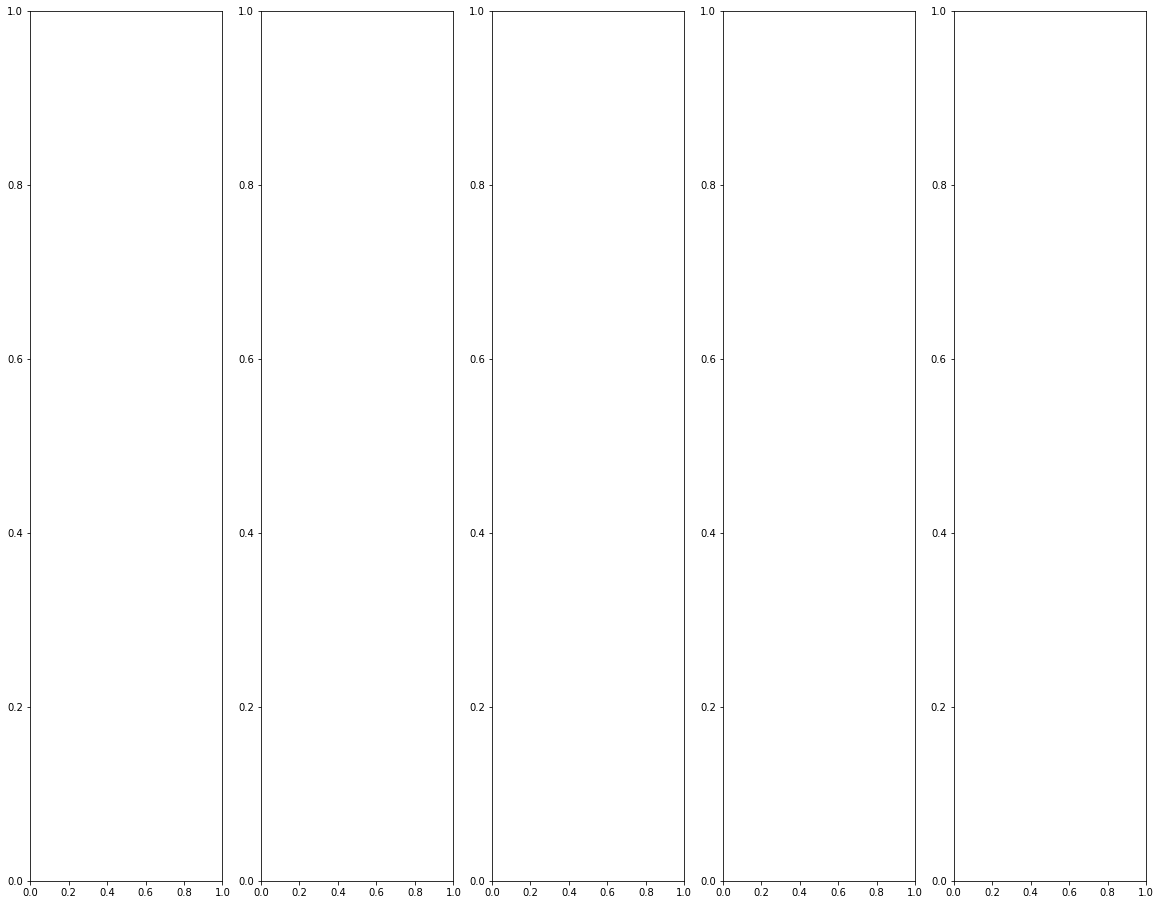

In [38]:
fig, (ax1,ax2,ax3,ax4,ax5) = plt.subplots(nrows=1, ncols=5, figsize=(20, 16))
ax1 = Man.plot(ax=ax1, column='Trip_0', legend=False,vmin=0,vmax=100000)
ax2 = Man.plot(ax=ax2, column='Trip_1', legend=False,vmin=0,vmax=100000)
ax3 = Man.plot(ax=ax3, column='Trip_2', legend=False,vmin=0,vmax=100000)
ax4 = Man.plot(ax=ax4, column='Trip_3', legend=False,vmin=0,vmax=100000)
ax5 = Man.plot(ax=ax5, column='Trip_4', legend=True,vmin=0,vmax=100000)
ax1.title.set_text('Total PUASE')
ax2.title.set_text('Phase 1')
ax3.title.set_text('Phase 2')
ax4.title.set_text('Phase 3')
ax5.title.set_text('Phase 4')

for ax in (ax1,ax2,ax3,ax4,ax5):
    ax.axis('off')